# Статистический метод количественной оценки понятности иностранных славянских языков для русскоязычных носителей
### Клышинский Эдуард
#### Материалы к статье

<a href="Понятность славянских языков - русский.pdf">Текст статьи</a>

<a name="review"></a>
### Обзор работ в области взаимной понятности языков

Под понятностью языка A для носителя языка B будем понимать средний процент правильных ответов, которые дали носители языка B при прохождении теста на языке A.

Понятность между двумя языками не является симметричной, то есть то, что ясно для носителей языка A в языке B, может быть не понятно для носителей языка B в языке A. 

Среди работ в данной области следует особо выделить большой проект [MICReLa](https://www.let.rug.nl/gooskens/project/?p=publications), посвященный анализу понятности основных мировых языков. Например, в статье [Mutual intelligibility between West and South Slavic languages](https://link.springer.com/article/10.1007%2Fs11185-015-9150-9) авторы показывают степень понятности западных и южных славянских языков. 

Для определения понятности языков используют различные методики:
- прослушивание и пересказ;
- перевод текста;
- перевод отдельных слов;
- выбор одного из вариантов перевода;
- тест с пропущенными словами;
- выбор иностранной фразы, наиболее полно описывающей изображение;
- опрос понятности языка по суъективным ощущениям.

<a name="method"></a>
### Метод определения взаимной понятности

В данной работе мы анализировали понятность текста на иностранном славянском языке при помощи теста с пропущенными словами.

Опрашиваемому предъявлялся параллельный текст на родном и иностранном славянском языках. Для языков, записываемых кириллицей, давалась транслитерация на латиницу. Для сохранения единообразия всех тестов проводилась и обратная замена - тексты на языках с латиницей давались с транслитерацией на кириллицу. В тексте на родном языке были пропущены некоторые слова, которые опрашиваемый должен был заполнить. Пропускались слова значимых частей речи: существительное, прилагательное и глагол. Расстояние между пропущенными словами  строго не выдерживалось. 

Для оценки корректности ответов использовались следующие критерии.<br>
Ответ считается *корректным*, если указано слово из художественного текста, его синоним или другое слово, передающее смысл пропущенного.<br>
Ответ считается *частично корректным*, если указано слово с тем же смыслом, но с измененной частью речи, или указано слово той же части речи, подходящее по тексту, но изменяющее смысл.<br>
Ответ *некорректен*, если не угадана часть речи, дана калька из параллельного текста, написана глупость или слово пропущено.<br>
В дальнейшем за корректный ответ давалось одно очко, за частично корректный ответ - 0,5, и за некорректный - 0 очков. Проверку естов проводил один эксперт. В ходе проверки отсеивались пользователи с менее чем 6 корректными или частично корректными ответами или с одним-двумя отличиями от исходного текста на родном языке. 

В качестве контрольного задания использовался текст только на родном языке, без параллельного иностранного текста, оцениваемый по тем же критериям. 

Пусть $u_{l,i}$ - понятность теста на языке $l$ для пользователя $i$, прошедшего этот тест. Она рассчитывается как среднее по оценкам ответов $ans_{l,i,k}$ для данного пользователя: $u_{l,i}=\frac{1}{len_t} \sum_{k=1}^{len_t}{ans_{l,i,k}}$, где $len_t$ - количество пропущенных слов в тесте. Тогда $u_{l}$ - понятность теста на языке $l$, определяется как среднее по понятности тестов для пользователей, которые его прошли: $u_l=\frac{1}{count_t} \sum_{i=1}^{count_t}{u_{l,i}}$, где $count_t$ - количество пользователей, прошедших тест. Пусть $u_*$ - средняя понятность контрольного теста. Тогда понятность языка $l$ может быть определена как разница между понятностью тестов на этом языке $u_{l}$ и контрольного теста $u_{*}$: $\Delta_l = u_l-u_*$


<a name="tools"></a>
### Программный инструментарий

Тесты были размещены на сайте ([русская версия теста](http://cosyco.ru/under/rus.html), большая просьба не отправлять результаты, так как Вам по ходу чтения станут известны ответы). Также на сайте располагался интерейс проверяющих, который включал в себя интерфейс проверки и интерфейс контроля результатов (рисунки приведены ниже).

Интерфейс проверяющего включал в себя список всех тестов (слева) и список ответов выбранного пользователя (справа). Чтобы разметчику было проще проводить оценку, рядом с ответом приводятся уже размеченный ответы. За счет этого разметчик может согласовывать текущую оценку с уже размеченными словами.

В интерфейсе контроля результатов можно оценить статистику ответов.

![Интерфейс проверки ответов](img/interface1.png)
<center>Интерфейс проверки ответов</center>

![Интерфейс контроля результатов](img/interface2.png)
<center>Интерфейс контроля результатов</center>


<a name="results"></a>
### Полученные результаты

Для просмотра результатов исследования вам необходимо выполнить код, который идет ниже.


In [1]:
# Загрузка библиотек.
import numpy as np
import pandas as pd
from math import sqrt
from scipy.stats import pearsonr
from scipy.stats import norm

import matplotlib as pl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.text import Text as plText
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import seaborn as sns
import matplotlib.transforms as transforms

from ipywidgets import interact, interactive_output, Select, HBox, FloatSlider
from IPython.display import display

import copy

# Own imports
from intelligibility_figures import *

### Загрузка полученных данных.

Для всех файлов первой колонкой является номер строки.

- **user_data.csv** - данные об информантах, принявших участие в опросе. Поля:
    - *id_user* - уникальный идентификатор каждого информанта;
    - *test_id* - номер теста, в котором принимал участие информант;
    - *parallel_lang* - на каком параллельном языке предъявлялся тест данному пользователю. *No Parallel Text* означает, что информант участвовал в контрольной группе, то есть восстанавливал слова без параллельного текста.
    - *age* - возрастная группа информанта. sch означает школьника, bak - студента бакалавриата, mag - студента магистратуры, fin - закончил обучение.
    - *speciality* - имеет ли образование информанта отношение к языковым специальностям (перевод, лингвистика, филология): yes - имеет, no - не имеет (или не было отмечено).
    - *known_langs* - какими иностранными славянскими языками владеет. Список из пяти и более языков означает, что информант отказался от прохождения параллельного теста и принимал участие в контрольной группе.
    - *ans_cnt* - количество непустых ответов, которые дал информант.
    
    
- *user_answers.csv* - ответы информантов в тестах. Поля:
    - *id_user* - уникальный идентификатор информанта. Значение должно присутствовать в таблице user_data.
    - *test_id* - номер теста, в котором принимал участие информант;
    - *parallel_lang* - на каком параллельном языке предъявлялся тест данному пользователю. Значение должно совпадать с таблицей user_data.
    - *answer_no* - номер пропуска в тесте, для которого восстановлено слово.
    - *answer* - текст ответа информанта;
    - *correctness* - оценка ответа асессором. incorr означает некорректный ответ, pcorr - частично корректный, corr - корректный.
    
    
- *texts.csv* - Текстовые фрагменты, использовавшиеся при тестировании. Слова, выделенные символом подчеркивания _ означают те слова, которые пропускались в тесте и их соответствия в параллельном тексте. Все тексты разбиты на предложения, предложения в разных языках выровнены, то есть разные переводы предложений имеют один и тот же номер. Поля:
    - *id_set* - номер теста.
    - *lang_name* - название языка, на котором написан текст.
    - *sent_pos* - номер предложения в тексте.
    - *sent* - текст предложения.

Загрузим исходные данные в pd.DataFrame для дальнейшего анализа.

In [2]:
# Загружаем пользовательские данные.
user_data = pd.read_csv("data/user_data.csv", index_col=0)
users_answers = pd.read_csv("data/user_answers.csv", index_col=0)

In [3]:
text_frame = pd.read_csv("data/texts.csv", index_col=0)
text_frame['id_set']=text_frame['id_set'].astype("str")

In [4]:
# Добавляем количественные оценки корректности ответов.
users_answers["marks"] = users_answers["correctness"]
users_answers["marks"] = users_answers["marks"].replace({"corr":1, "pcorr":0.5, "incorr":0})

In [5]:
# рассчитываем среднюю корректность ответов по пользователям, добавляем ее к пользователям.
mean_marks = users_answers.groupby("id_user").mean()["marks"]
mean_marks.name = "mean_mark"
user_data = user_data.join(mean_marks, on="id_user")

In [6]:
# Считаем количество информантов, прошедших тест по тестам и параллельным языкам.
part_no = pd.DataFrame(columns=["test_id","parallel_lang", "count"])
req = user_data.groupby(["test_id", "parallel_lang"]).count()
part_no["count"] = req["id_user"]
part_no["test_id"] = req.index.get_level_values("test_id")
part_no["parallel_lang"] = req.index.get_level_values("parallel_lang")
part_no.index = range(part_no.shape[0])

In [7]:
# Рассчитываем по всем пользователям среднюю понятность слова в данной позиции теста
# при фиксированном тесте и параллельном языке.
qu_data = pd.DataFrame()
req = users_answers[["test_id", "parallel_lang", "answer_no", "marks"]].groupby(["test_id", "parallel_lang", "answer_no"]).mean()
qu_data["mean_mark"] = req["marks"]
qu_data["test_id"] = req.index.get_level_values("test_id")
qu_data["parallel_lang"] = req.index.get_level_values("parallel_lang")
qu_data["answer_no"] = req.index.get_level_values("answer_no")
qu_data.index = range(qu_data.shape[0])

Для проверки посмотрим на распределение числа не пустых ответов по информантам. Видно, что большинство информантов старалось дать как можно больше ответов.

In [8]:
def drawCompletenessStub(test_id):
    drawCompleteness(test_id, users_answers)
    
esel = Select(options=[1, 2, 3, 4, 5, 6], value=1, description='Test: ')
out = interactive_output(drawCompletenessStub, {'test_id': esel})
ui = HBox([out, esel])
display(ui)    

В качестве материала для тестов использовались следующие фрагменты.

(1) <b>М.А. Булгаков “Мастер и Маргарита”</b>, сцена казни Иешуа - 42 пропущенных слова из 390, 16 предложений.<br>
(2) Сцена диагностики Бездомного в сумасшедшем доме - 39 пропущенных слов из 396, 23 предложения.<br>
(6) Беседа с Воландом на Патриарших Прудах после описания сцены казни - 35 пропущенных слов из 337, 16 предложений.

(3) <b>Г. Сенкевич “Камо грядеши”</b>, сцена поездки Марка Виниция в горящий Рим - 35 пропущенных слов из 278, 20 предложений.<br>
(4) Размышления Виниция о сбежавшей Лигии - 44 пропущенных слова из 408, 20 предложений.<br>
(5) Виниций думает о похищении Лигии - 37 пропущенных слов из 380, 23 предложения<br>

“Мастер и Маргарита” - русский оригинал и художественные переводы на польский, чешский, словацкий, украинский, белорусский, сербский, болгарский, словенский (кроме теста 6).  
“Камо грядеши” - польский оригинал и художественные переводы на русский, белорусский, украинский, чешский, польский, сербский, болгарский, словенский.
Для всех языков пропускались одни и те же слова.

Здесь вы можете посмотреть тексты, которые использовались для тестов. Слова, выделенные знаками подчеркивания, означают, что они должны быть пропущены, если данный текст является родным для опрашиваемого. При предъявлении текста в качестве параллельного, знаки подчеркивания опускались.

In [9]:
def show_test(lang, test_no):
    display([t[1].sent for t in text_frame[(text_frame.lang_name==lang) & (text_frame.id_set==test_no)].iterrows()])

lsel = Select(options=['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Serbian', 'Polish', 'Czech', 'Slovak', 'Slovene'], value='Russian', description='Language: ')
esel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
ui = HBox([lsel, esel])
out = interactive_output(show_test, {'lang': lsel, 'test_no': esel})
display(ui, out)

Output()

**Участники эксперимента** 

Студенты из Москвы, Санкт-Петербурга, и Владивостока, школьники из Москвы, взрослые участники из разных городов, участники с Толоки (более 50%).

Ниже вы можете посмотреть количество участников по языкам и тестам. 

In [10]:
# Drawing data on the number of partisipants.
display(part_no.sort_values(["parallel_lang", "test_id"]))

,test_id,parallel_lang,count
0,1,Belorussian,38
9,2,Belorussian,38
18,3,Belorussian,37
27,4,Belorussian,82
36,5,Belorussian,48
45,6,Belorussian,37
1,1,Bulgarian,37
10,2,Bulgarian,37
19,3,Bulgarian,37
28,4,Bulgarian,37


Также участники вводили информацию о своем образовании и других иностранных славянских языках, которые они знают.
Знакомые языки испытуемым не предлагались. 


Наша первая гипотеза состояла в том, что при наличии параллельного текста на иностранном славянском языке, которого не знает пользователь, ответы должны быть более корректными, при этом рост точности ответов должен коррелировать с понятностью этого иностранного языка. Например, в контрольном тесте пользователи чаще должны вставлять некорректные или частично корректные ответы, тогда как при наличии когната в параллельном тексте ответы должны смещаться к большему числу корректных или частично корректных. 

Каждая точка на графике ниже означает понимаемость теста для одного участника. По оси X записаны языки параллельных текстов, контрольная группа обозначена как "Контроль". Цветные вертикальные полосы означают нижнюю и верхнюю границу 95% доверительного интервала для среднего по ответам пользователей, крест обозначает среднее значение. Серая полоса означает доверительный интервал для контрольного теста.

В таблице под рисунком строка *count* означает количество полученных ответов, *mean* - среднее значение по ответам участников, *ci_min* и *ci_max* - нижнюю и верхнюю границу 95% доверительного интервала для среднего по ответам пользователей.

<IPython.core.display.Javascript object>


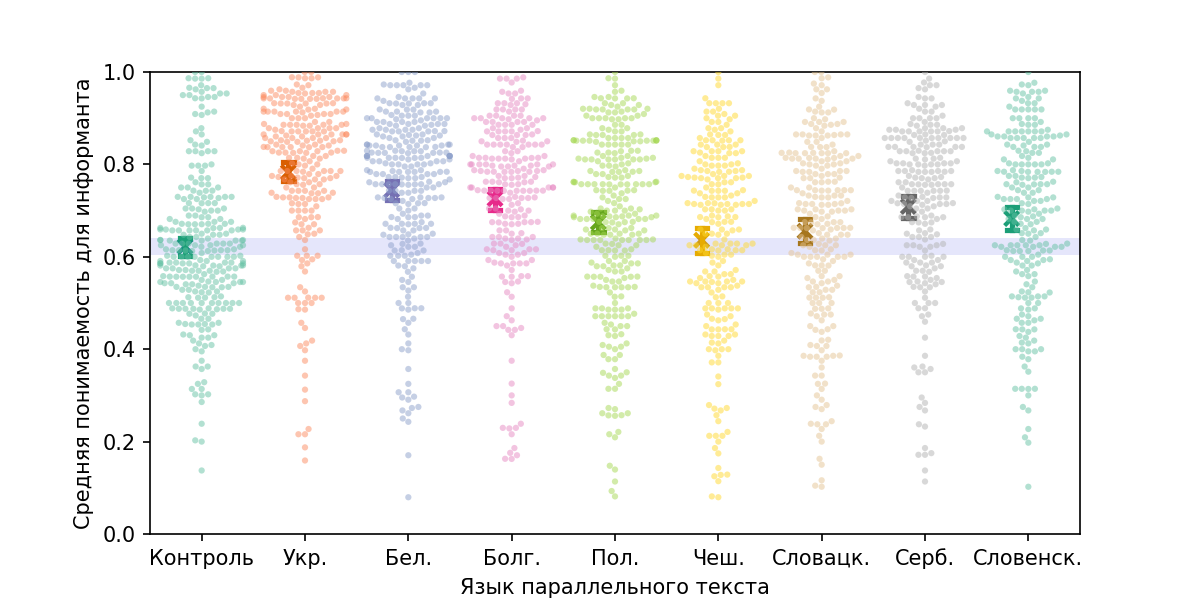

Select(description='Test: ', index=6, options=('1', '2', '3', '4', '5', '6', 'All'), value='All')

Output()

In [11]:
def showLangsStub(test):
    show_langs(test, user_data, axes)

%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(8,4), num=1)

#lsel = Select(options=['Russian', 'Ukranian', 'Serbian'], value='Russian', description='Language: ')
esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='All', description='Test: ')
#ui = HBox([lsel,esel])
out = interactive_output(showLangsStub, {'test': esel})
#out.layout.height = '200px'
display(esel, out)
fig.savefig('img_res/Fig_1_general_distribution_users.png', dpi = 600)

На рисунке ниже можно увидеть распределение среднего и доверительных интервалов по языкам в зависимости от теста. Ниже те же данные сгруппированы по языкам. Для каждой пары "тест-язык" даны среднее значение и доверительный интервал.

<IPython.core.display.Javascript object>


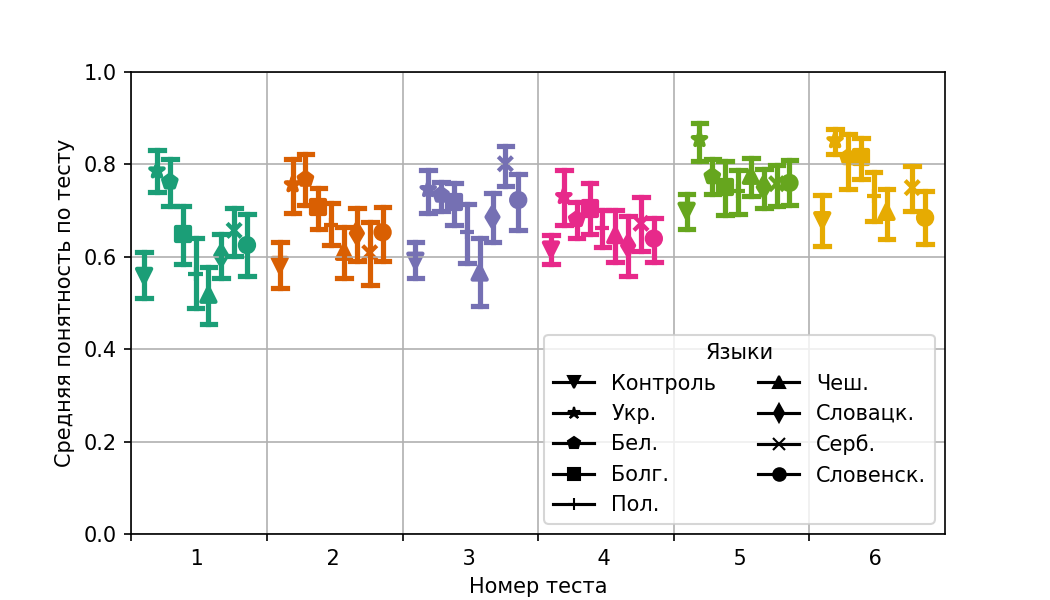

In [12]:
show_langs_by_tests(user_data, axes)

<IPython.core.display.Javascript object>


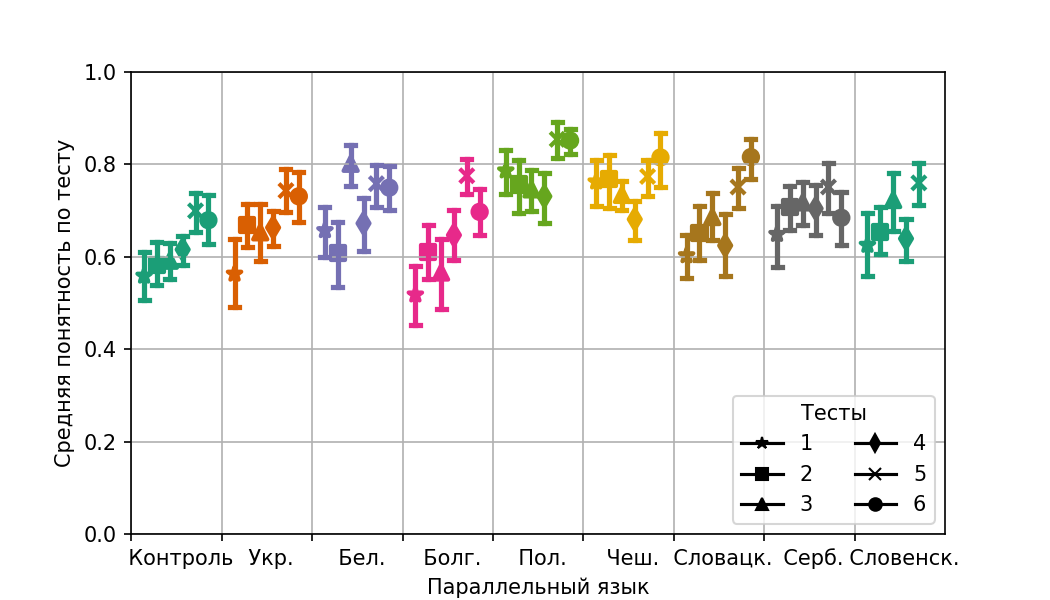

In [13]:
show_tests_by_langs(user_data, axes)

Из графиков видно, что тесты 5 и 6 являются самыми простыми — их средняя понятность на контрольном тесте составляет 0.7 и 0.68, соответственно. Если рассматривать результаты по языкам, то для украинского языка разница оказалась значимой на всех тестах; для белорусского — на всех, кроме четвертого; для болгарского — для половины тестов. Польский, чешский, словацкий и словенский показали значимый прирост лишь в одном тесте, сербский — в двух. При этом заметим, что на материале всех тестов польский, словенский и сербский показали статистически значимый прирост. Для чешского языка разница с контрольным тестом была отрицательной два раза (первый и третий тесты). Таким образом, можно утверждать, что в текстах на украинском, белорусском и болгарском языках всегда содержится подсказка для русскоязычного читателя, тогда как тексты на остальных языках необходимо рассматривать индивидуально. Также можно утверждать, что понятность конкретного текста на заданном языке зависит от некоторых параметров.

Посмотрим теперь на зависимость ответов пользователей от их уровня образования.

Строки таблицы обозначены также как и выше. Столбцы даются в следующем порядке:
- *sch* - школьники;
- *bak* - бакалавры;
- *mag* - магистранты;
- *asp* - аспиранты;
- *fin* - завершили обучение;
- *unk* - не указали информацию;
- *unk2* - участники третьего теста для русского языка (информация не собиралась).

Розовые точки означают контрольную группу.

Красным обозначены интервалы по всем пользователям, зеленым - по получившим или получающим то или иное образование, связанное с языком, синим - не получившие такого образования.

<IPython.core.display.Javascript object>


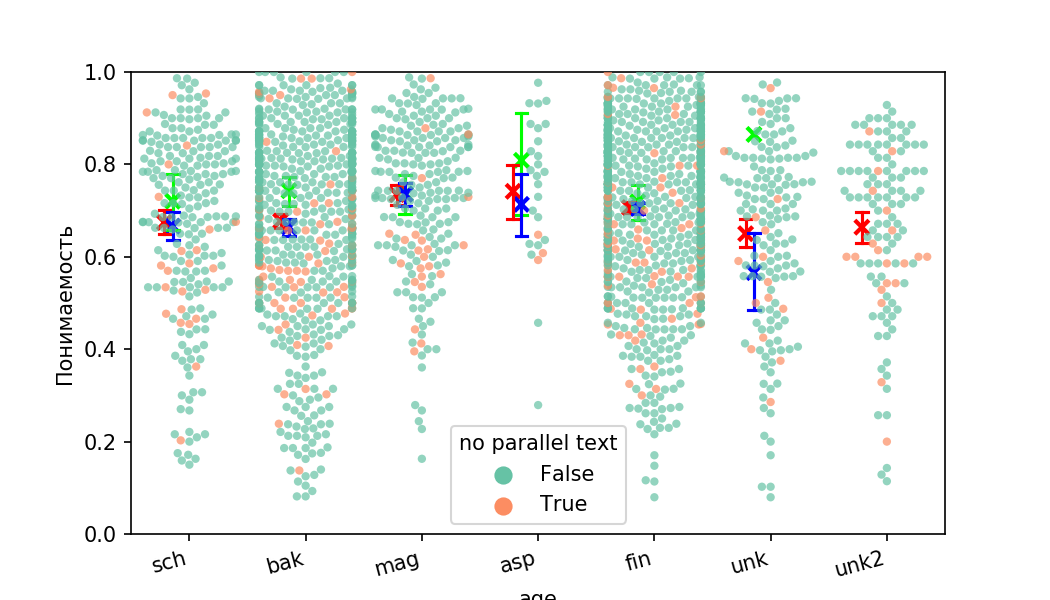

Output()

In [14]:
def showAgeStub(field, test):
    show_age(field, test, user_data, axes)

%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(7,4), num=2)

#lsel = Select(options=['Russian', 'Ukranian', 'Serbian', 'All'], value='Russian', description='Language: ')
fsel = Select(options=['age', 'spec'], value='age', description='Values: ')
esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='All', description='Test: ')
ui = HBox([fsel, esel])
out = interactive_output(showAgeStub, {'field': fsel, 'test': esel})
#out.layout.height = '200px'
display(ui, out)

Как видно из полученных данных, бакалавры менее аккуратно заполняют тест. "Хвост" с низкими значениями оценки частично объясняется тем, что ближе к середине теста часть студентов отправляла анкету, сотавив вторую половину незаполненной. Среди прочих участников такое поведение является более редким. Большинство участников третьего теста также были бакалаврами, их поведение является сходным. Результаты для школьников и аспирантов доверительно лучше.

Для русского языка можно построить следующую картину. При отсутствии параллельного текста результаты в среднем не изменяются. Однако при наличии такого текста, участники, имеющие отношение к лингвистике, дают доверительно лучшие ответы. Но если вид образования наложить на уровень образования, то становится понятным, что лингвистическое образование улучшает результаты только для школьников или бакалавров, а уже начиная с магистратуры результаты практически не отличаются. 

Мы также исследовали зависимость ответов от знания других славянских языков. Однако исследование не показало значительных отклонений от группы, не указавших знания других языков.

<IPython.core.display.Javascript object>


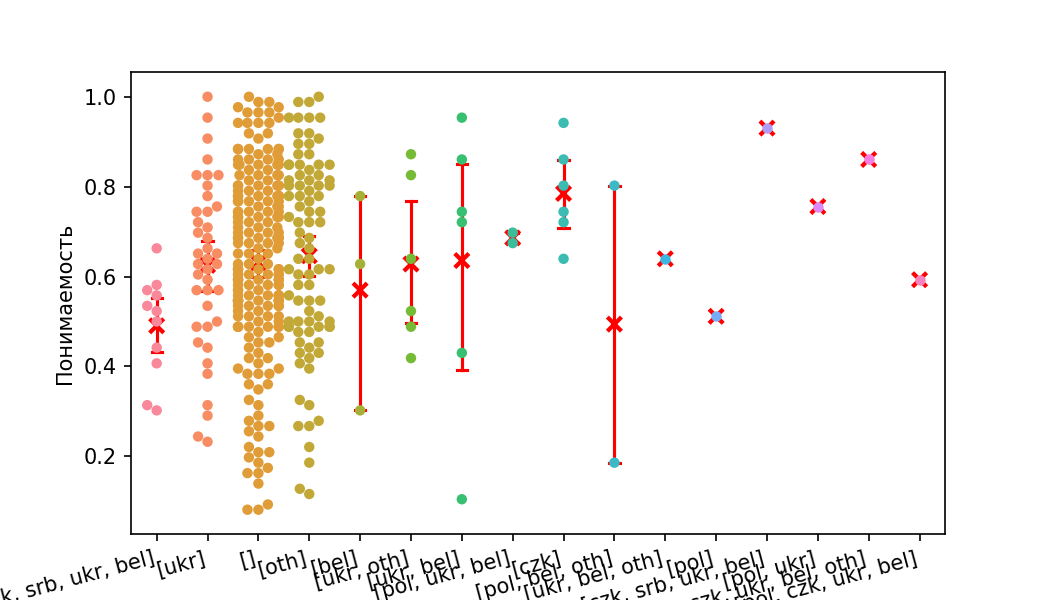

Output(layout=Layout(height='100px'))

In [15]:
def drawForeignStub(test_no):
    drawForeign(test_no, user_data, axes)

%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(7,4), num=2)

esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='1', description='Test: ')
ui = HBox([lsel, esel])
out = interactive_output(drawForeignStub, {'test_no': esel})
axes.set_xticklabels(axes.get_xticklabels(), rotation=15, ha='right')

out.layout.height = '100px'
display(ui, out)

Также была рассмотрена гипотеза о том, что понятности текста зависит от доли сходных слов в нем. Известно, что многие слова разных славянских языков имеют общие корни. Наличие таких слов облегчает понимание текста.

Ниже привеена разметка слов текстов по сходству. Знаком 1 обозначены слова, имеющие общий корень. Знаком 2 обозначены слова, для которых в родном языке имеется слово со сходным смыслом и тем же корнем, что в параллельном тексте. Знаком 0 обозначены слова, не имеющие аналогов или какого-либо сходства в родном языке. Наконец, знаком ! обозначены "ложные друзья переводчика", например, "за его спиной" - "у яго за _плячыма_" (в русском языке "за плечами" имеет другое значение).

```Python
sim_rus1={#    0        10        20        30        40  
"Belorussian":"101!121122201111112110111121021111011011100",  
"Bulgarian"  :"200!!100201020111122201122012201!12112211!0",  
"Czech"      :"010!00020021010011222!01000202!2!2221!21000",  
"Polish"     :"021!01102022102111202201010002!000!01001002",  
"Serbian"    :"01000100!011210111220!11220100!1!122122100!",  
"Slovak"     :"220!00000022010101220!110002220210211020002",  
"Ukranian"   :"1211121020121111012110111221010111001210100",   
"Slovene"    :"002!012!!020000011021!01222002!2!020102112!",  
}

sim_rus2={#    0        10        20        30        40  
"Belorussian":"110211112110001110210202!0!!111121201020",  
"Bulgarian"  :"!10111200021!121100100010!1211120121!120",  
"Czech"      :"!!02010201002!21000100200!2001102121!0!0",  
"Polish"     :"10000001!120!02100010022!0101112!021!020",  
"Serbian"    :"!0011010!020012110!100020!10111!11210120",  
"Slovak"     :"!00201022100022100010000!!2011120121!120",  
"Ukranian"   :"21011110!110201110010102!0221111!1201220",     
"Slovene"    :"!201100000!0202102!1000222!2111!!021!1!0",  
}

sim_rus3={#    0        10        20        30
"Belorussian":"100220101222!122111!1!121!10!211121",  
"Bulgarian"  :"12100111!0002100112!1!101!11!111101",  
"Czech"      :"110220!002000!00!1!22!0!!!!2!1!102!",  
"Polish"     :"100222!01202!!00!12!2!12!!!2!1!1121",  
"Ukranian"   :"111022!012!2!!00!1211!12!!!2!1!1121",  
"Slovak"     :"111220!0220!0!!0!1!!2!22!2!2!!2111!",  
"Slovene"    :"102222!200020!!0!1122!12!1!2!!2110!",  
"Serbian"    :"11!0211!012001101100201!1!10!101122",  
}

sim_rus4={#    0        10        20        30        40  
"Ukranian"   :"110!1!1!21212!22!1!2!01!10001!21000!1001!00!",  
"Belorussian":"01!1212020212222!2!2!0121!001!2!!00210011000",  
"Polish"     :"20!12!202!022022!2!2!01010!01!20!00221121000",  
"Bulgarian"  :"02012212!1!2!121!!22111!211111010!020121110!",  
"Czech"      :"02!11!!20!200021!122201010!!0!01202022111220",  
"Slovak"     :"!2201!220!210021!2!02!1010!000012010121!1!!2",  
"Slovene"    :"22000!0002220021!2122202!2202220!0!210121110",  
"Serbian"    :"!20112000122221200222102!2121!02!00!0101100!",  
}

sim_rus5={#    0        10        20        30        40  
"Ukranian"   :"211101111021110111211110!10020102!010",  
"Belorussian":"011001010001100!1102111!!000201022!10",  
"Polish"     :"21100101100200201102111000!!101010010",  
"Bulgarian"  :"222!00!!10221!2!12!01111!2111221121!1",  
"Czech"      :"221!!0!110221!201002111!!000101111010",  
"Slovak"     :"22!!1!!112221!!111021110!000111010210",  
"Slovene"    :"2!20!20!!!2200!1!102111!02111!!010212",  
"Serbian"    :"2!2!!!!!00221!!011!!1110001112!000002",  
}

sim_rus6={#    0        10        20        30        40  
"Ukranian"   :"!1110211210012210001001111210111101",  
"Belorussian":"!11112110101111!0011010111120111101",  
"Polish"     :"!11122110100122!0022001121100122200",  
"Bulgarian"  :"111110011101111112!10!0111000121112",  
"Czech"      :"!11101200000100!00010!0!0!1!100001!",  
"Serbian"    :"11111201211!1!!1!!!10!01!102!211112",  
"Slovene"    :"!12120211100122!2202002221!22!22120",  
}
```

Код, размещенный ниже, позволяет посмотреть соответствия пропущенных слов между собой. Заметим, что в первом тексте в некоторых языках слова внутри нескольких предложений поменялись местами. В таблице ниже этот недостаток исправлен.

In [16]:
def showWordsStub(test_no: str):
    showWords(test_no, text_frame)

%matplotlib notebook

esel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
ui = HBox([esel])
out = interactive_output(showWordsStub, {'test_no': esel})
display(ui, out)


Output()

Итак, построим график, показывающий зависимость понятности слова от его типа - однокоренное, есть однокоренной аналог, нет аналогов, ложный друг переводчика.

Каждая точка на графике слева означает слово в тесте с одним из параллельных языков, на графике справа - без параллельного теста (контроль). Доверительные интервалы нарисованы тем же цветом, что и точки, цвета соответствуют типам слов и тестам. Красные доверительные интервалы на рисунке слева показывают соответствующие доверительные интервалы контроля (графика справа) и позволяют визуально оценить изменения в понимаемости при наличии параллельного текста.

<IPython.core.display.Javascript object>


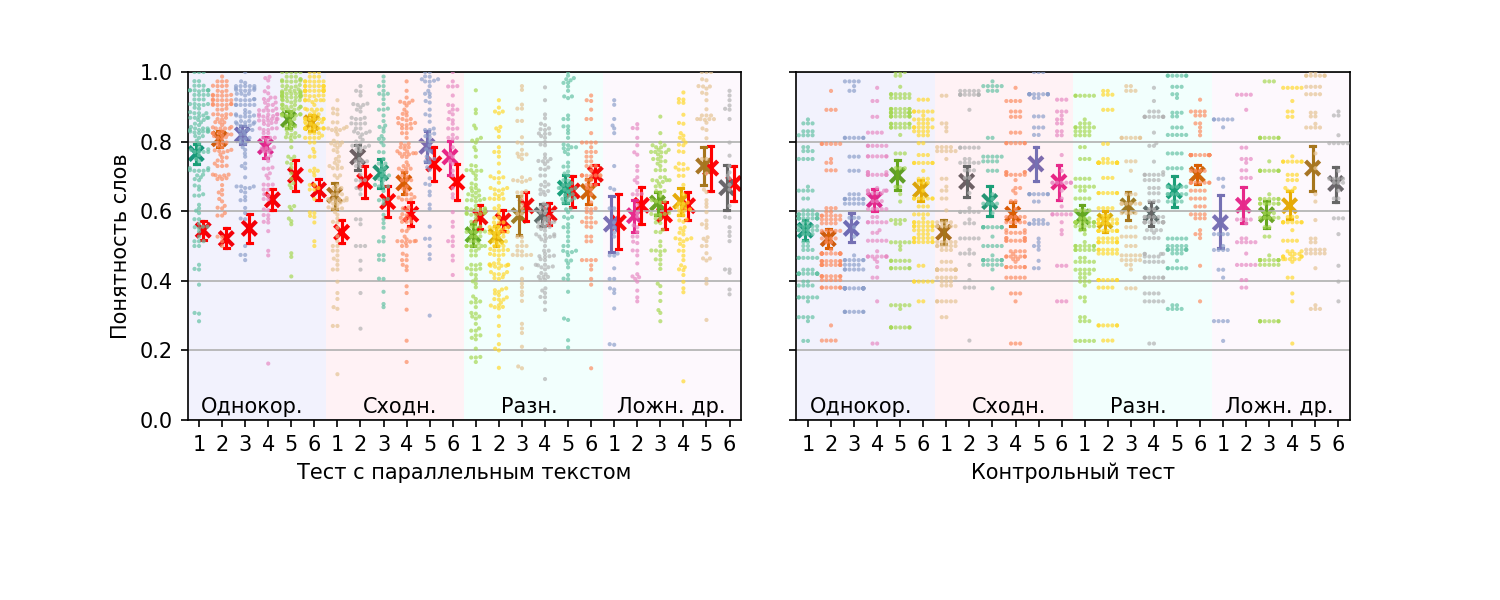

In [17]:
%matplotlib notebook

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4), num=3)
showIntelligibility(qu_data, text_frame, axes, fig)

Из графиков видно, что в русском языке слова, однокоренные словам из параллельного текста, угадываются примерно в полтора раза лучше, чем при отсутствии подсказки. Для слов, имеющих сходные слова в языке параллельного текста, ситуация не столь однозначная. В первом тесте наблюдается доверительное улучшение, тогда как для второго и третьего текстов улучшение незначительно. Слова, не имеющие аналогов, и "ложные друзья переводчика" скорее мешают понимать текст.

Теперь посмотрим на то, как ведет себя понимаемость теста в зависимости от процента сходных слов в параллельном тексте. 

In [18]:
all_resn, all_tests = processIntelligibility(qu_data, text_frame)
intellig = pd.DataFrame()
#mean1 = drawAnIntel(all_resn, intellig, "Russian", 'False Friends', 1, 43, axes, 'brief')
mean2 = drawAnIntel(user_data, all_resn, intellig, 'False Friends', 2, 40, None)
intellig

,cnt2,intel2
lang,,
Belorussian,0.075,0.768421
Bulgarian,0.100,0.708446
Czech,0.150,0.580312
Polish,0.125,0.669034
Serbian,0.125,0.577564
Slovak,0.100,0.650847
Slovene,0.200,0.653041
Ukranian,0.075,0.756419


Ниже показаны соотношение процента сходных слов и результатов прохождения теста. По оси X откладывается доля слов выбранного типа в параллельном тексте. По оси Y откладывается средняя понимаемость теста по всем пользователям, которые его проходили.  
Тесты с разными параллельными текстами показаны разным цветом, номера тестов обозначены формой маркера. Соответствующую числовую информацию можно найти в таблице. Красная линия по диагонали дана в качества базы и соответствует линии ((0,0), (1,1)). Горизонтальные линии показывают результаты прохождения теста без параллельного текста в качестве подсказки.


<IPython.core.display.Javascript object>


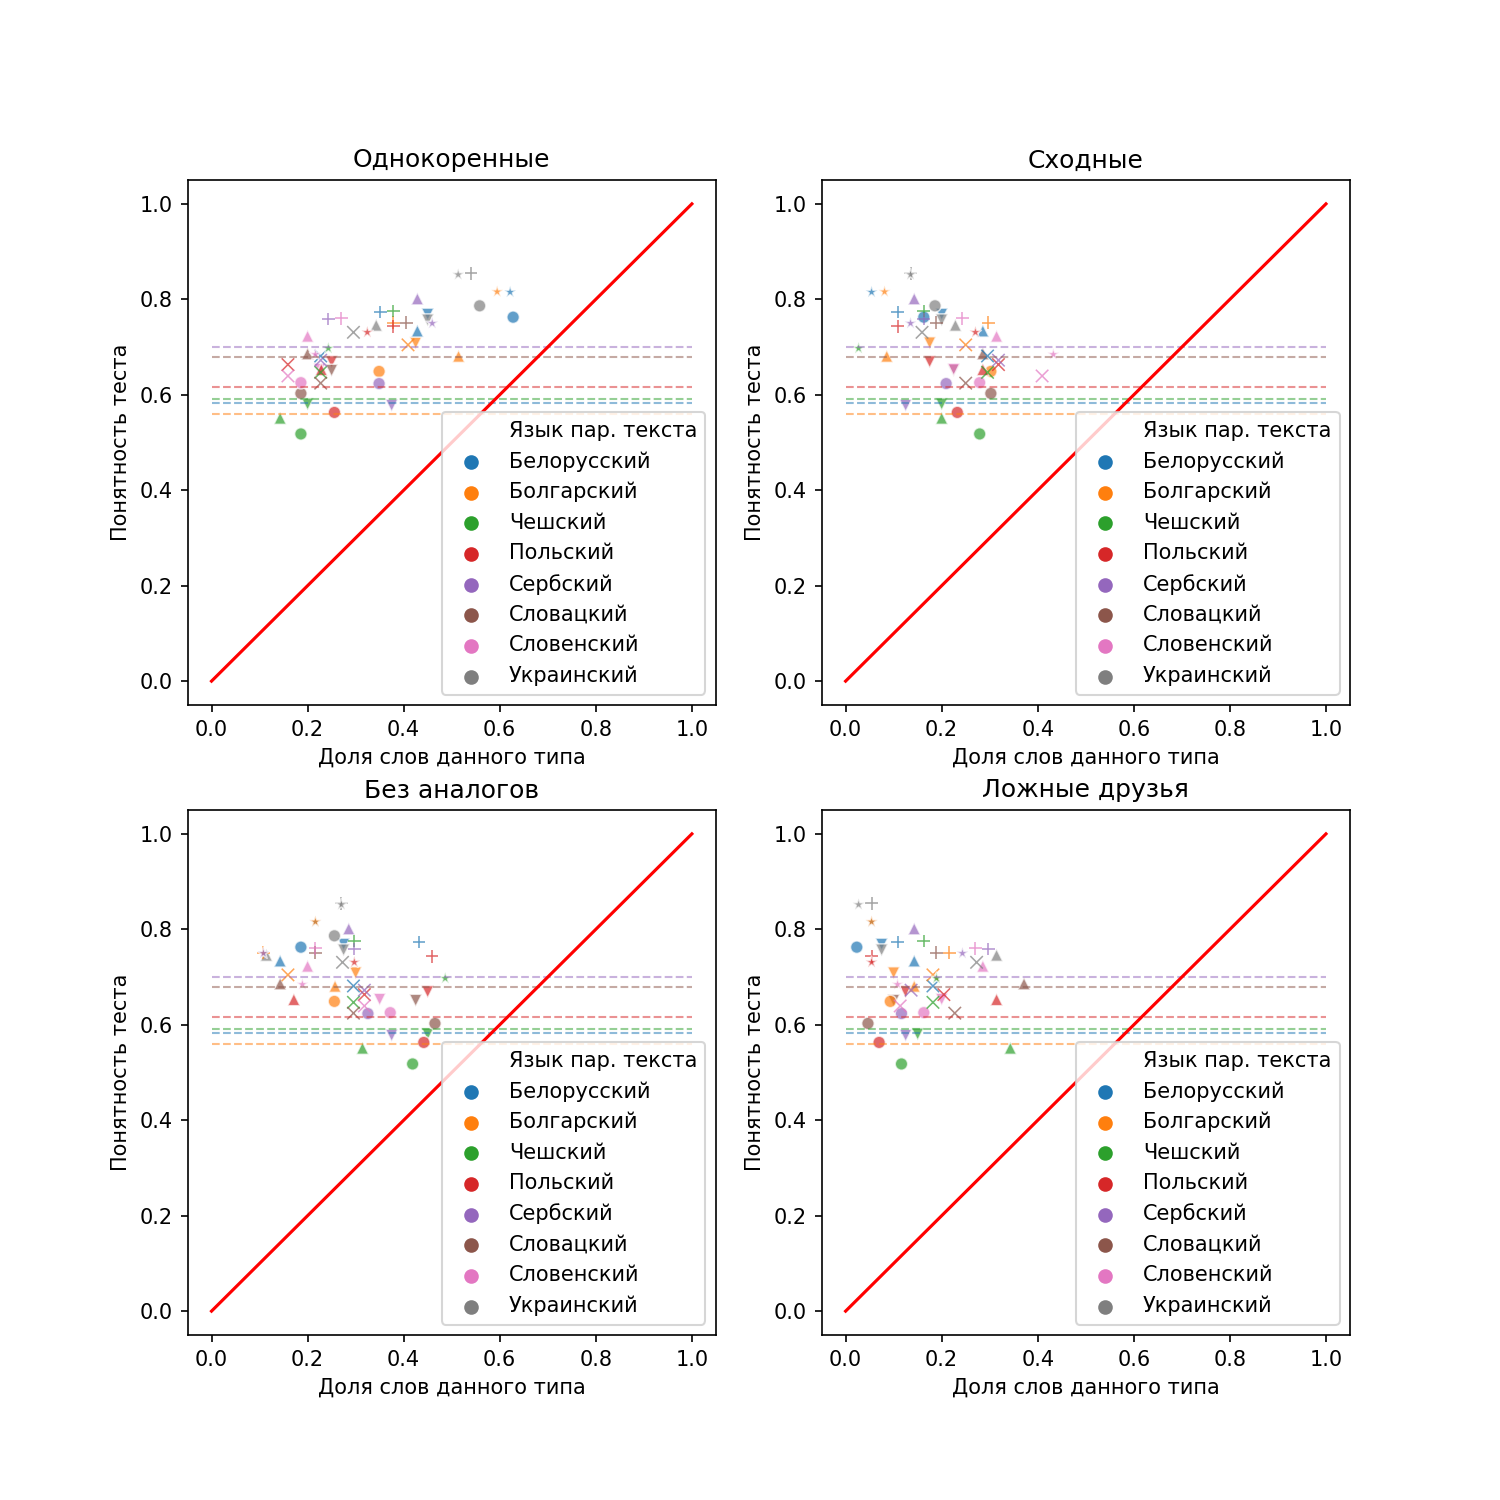


----------
 Same 
----------


,"%Sim.Words, Test1","Avg.Results, Test1","%Sim.Words, Test2","Avg.Results, Test2","%Sim.Words, Test3","Avg.Results, Test3","%Sim.Words, Test4","Avg.Results, Test4","%Sim.Words, Test5","Avg.Results, Test5","%Sim.Words, Test6","Avg.Results, Test6"
lang,,,,,,,,,,,,
Belorussian,0.450,0.768421,0.627907,0.762546,0.428571,0.733977,0.227273,0.681264,0.351351,0.773930,0.621622,0.815058
Bulgarian,0.425,0.708446,0.348837,0.648963,0.514286,0.680952,0.409091,0.704545,0.378378,0.751126,0.594595,0.815830
Czech,0.200,0.580312,0.186047,0.517913,0.142857,0.551128,0.227273,0.646970,0.378378,0.775383,0.243243,0.697297
Polish,0.250,0.669034,0.255814,0.562984,0.228571,0.653008,0.159091,0.663262,0.378378,0.743243,0.324324,0.730888
Serbian,0.375,0.577564,0.348837,0.623435,0.428571,0.801339,0.227273,0.672460,0.243243,0.758258,0.459459,0.749725
Slovak,0.250,0.650847,0.186047,0.602797,0.200000,0.686081,0.227273,0.624369,0.405405,0.751014,NaN,NaN
Slovene,0.225,0.653041,0.186047,0.625393,0.200000,0.722932,0.159091,0.639435,0.270270,0.759974,0.216216,0.684524
Ukranian,0.450,0.756419,0.558140,0.786414,0.342857,0.745946,0.295455,0.730861,0.540541,0.854273,0.513514,0.851737
No Parallel Text,NaN,0.558668,NaN,0.582337,NaN,0.591506,NaN,0.615734,NaN,0.699540,NaN,0.679221


Correlation by tests
Test 1 0.6833020965105949
Test 2 0.903241123192412
Test 3 0.5827478470801278
Test 4 0.6535773793951538
Test 5 0.7053060302928462
Test 6 0.9093902797030744
All Tests 0.7151226796442292

Correlation by language
Belorussian 0.7635356260000635
Bulgarian 0.6370547233601364
Czech 0.9099754276081999
Polish 0.5769591730808501
Serbian 0.1827630846586452
Slovak 0.8394064893144602
Slovene 0.7487153630910783
Ukranian 0.7920721304586705

----------
 Similar 
----------


,"%Sim.Words, Test1","Avg.Results, Test1","%Sim.Words, Test2","Avg.Results, Test2","%Sim.Words, Test3","Avg.Results, Test3","%Sim.Words, Test4","Avg.Results, Test4","%Sim.Words, Test5","Avg.Results, Test5","%Sim.Words, Test6","Avg.Results, Test6"
lang,,,,,,,,,,,,
Belorussian,0.200,0.768421,0.162791,0.762546,0.285714,0.733977,0.295455,0.681264,0.108108,0.773930,0.054054,0.815058
Bulgarian,0.175,0.708446,0.302326,0.648963,0.085714,0.680952,0.250000,0.704545,0.297297,0.751126,0.081081,0.815830
Czech,0.200,0.580312,0.279070,0.517913,0.200000,0.551128,0.295455,0.646970,0.162162,0.775383,0.027027,0.697297
Polish,0.175,0.669034,0.232558,0.562984,0.285714,0.653008,0.318182,0.663262,0.108108,0.743243,0.270270,0.730888
Serbian,0.125,0.577564,0.209302,0.623435,0.142857,0.801339,0.318182,0.672460,0.162162,0.758258,0.135135,0.749725
Slovak,0.225,0.650847,0.302326,0.602797,0.285714,0.686081,0.250000,0.624369,0.189189,0.751014,NaN,NaN
Slovene,0.225,0.653041,0.279070,0.625393,0.314286,0.722932,0.409091,0.639435,0.243243,0.759974,0.432432,0.684524
Ukranian,0.200,0.756419,0.186047,0.786414,0.228571,0.745946,0.159091,0.730861,0.135135,0.854273,0.135135,0.851737
No Parallel Text,NaN,0.558668,NaN,0.582337,NaN,0.591506,NaN,0.615734,NaN,0.699540,NaN,0.679221


Correlation by tests
Test 1 0.31446154354573846
Test 2 -0.6713783647222827
Test 3 -0.03047091394507474
Test 4 -0.6427976746102942
Test 5 -0.3051892958149724
Test 6 -0.5005085378423434
All Tests -0.426160746381487

Correlation by language
Belorussian -0.9066250169249004
Bulgarian -0.39842703346535985
Czech -0.5220146794660875
Polish -0.32741270223809354
Serbian -0.19912694338229994
Slovak -0.6940444714465207
Slovene -0.2080391958595013
Ukranian -0.7263045084009759

----------
 No analogues 
----------


,"%Sim.Words, Test1","Avg.Results, Test1","%Sim.Words, Test2","Avg.Results, Test2","%Sim.Words, Test3","Avg.Results, Test3","%Sim.Words, Test4","Avg.Results, Test4","%Sim.Words, Test5","Avg.Results, Test5","%Sim.Words, Test6","Avg.Results, Test6"
lang,,,,,,,,,,,,
Belorussian,0.275,0.768421,0.186047,0.762546,0.142857,0.733977,0.295455,0.681264,0.432432,0.773930,0.216216,0.815058
Bulgarian,0.300,0.708446,0.255814,0.648963,0.257143,0.680952,0.159091,0.704545,0.108108,0.751126,0.216216,0.815830
Czech,0.450,0.580312,0.418605,0.517913,0.314286,0.551128,0.295455,0.646970,0.297297,0.775383,0.486486,0.697297
Polish,0.450,0.669034,0.441860,0.562984,0.171429,0.653008,0.318182,0.663262,0.459459,0.743243,0.297297,0.730888
Serbian,0.375,0.577564,0.325581,0.623435,0.285714,0.801339,0.318182,0.672460,0.297297,0.758258,0.108108,0.749725
Slovak,0.425,0.650847,0.465116,0.602797,0.142857,0.686081,0.295455,0.624369,0.216216,0.751014,NaN,NaN
Slovene,0.350,0.653041,0.372093,0.625393,0.200000,0.722932,0.318182,0.639435,0.216216,0.759974,0.189189,0.684524
Ukranian,0.275,0.756419,0.255814,0.786414,0.114286,0.745946,0.272727,0.730861,0.270270,0.854273,0.270270,0.851737
No Parallel Text,NaN,0.558668,NaN,0.582337,NaN,0.591506,NaN,0.615734,NaN,0.699540,NaN,0.679221


Correlation by tests
Test 1 -0.768388436815354
Test 2 -0.8350470606609304
Test 3 -0.33870606602336883
Test 4 -0.5265673766783192
Test 5 -0.0031166362099192247
Test 6 -0.26434668925915245
All Tests -0.458395070703598

Correlation by language
Belorussian 0.005954757878326715
Bulgarian -0.37890975904390656
Czech -0.21713178761235236
Polish -0.05087532950469365
Serbian -0.577228055398521
Slovak -0.702898547476438
Slovene -0.8157636011671167
Ukranian 0.36479320145679933

----------
 False Friends 
----------


,"%Sim.Words, Test1","Avg.Results, Test1","%Sim.Words, Test2","Avg.Results, Test2","%Sim.Words, Test3","Avg.Results, Test3","%Sim.Words, Test4","Avg.Results, Test4","%Sim.Words, Test5","Avg.Results, Test5","%Sim.Words, Test6","Avg.Results, Test6"
lang,,,,,,,,,,,,
Belorussian,0.075,0.768421,0.023256,0.762546,0.142857,0.733977,0.181818,0.681264,0.108108,0.773930,0.054054,0.815058
Bulgarian,0.100,0.708446,0.093023,0.648963,0.142857,0.680952,0.181818,0.704545,0.216216,0.751126,0.054054,0.815830
Czech,0.150,0.580312,0.116279,0.517913,0.342857,0.551128,0.181818,0.646970,0.162162,0.775383,0.189189,0.697297
Polish,0.125,0.669034,0.069767,0.562984,0.314286,0.653008,0.204545,0.663262,0.054054,0.743243,0.054054,0.730888
Serbian,0.125,0.577564,0.116279,0.623435,0.142857,0.801339,0.136364,0.672460,0.297297,0.758258,0.243243,0.749725
Slovak,0.100,0.650847,0.046512,0.602797,0.371429,0.686081,0.227273,0.624369,0.189189,0.751014,NaN,NaN
Slovene,0.200,0.653041,0.162791,0.625393,0.285714,0.722932,0.113636,0.639435,0.270270,0.759974,0.108108,0.684524
Ukranian,0.075,0.756419,NaN,0.786414,0.314286,0.745946,0.272727,0.730861,0.054054,0.854273,0.027027,0.851737
No Parallel Text,NaN,0.558668,NaN,0.582337,NaN,0.591506,NaN,0.615734,NaN,0.699540,NaN,0.679221


Correlation by tests
Test 1 -0.63190131862101
Test 2 -0.4472121784852705
Test 3 -0.5298831948311804
Test 4 0.4306320669915611
Test 5 -0.46645196521859034
Test 6 -0.575464305907422
All Tests -0.16885270132216085

Correlation by language
Belorussian -0.7934602303632162
Bulgarian -0.16459075903905132
Czech -0.15736099982725765
Polish -0.21925005146153373
Serbian 0.583319592138887
Slovak 0.4249848123270343
Slovene 0.7286837458968101
Ukranian -0.7973896400263704


In [19]:
%matplotlib notebook
show_intel_all(user_data, qu_data, text_frame)

Ниже можно посмотреть изменение результатов для отдельных слов при наличии или отсутствии параллельного текста. Здесь можно выбрать номер теста, пороговое значение, должно ли значение быть меньше или превосходить пороговое значение, слова какого типа следует отображать.

Фильтрация производится по значениям, показанным на параллельных текстах.

In [20]:
def showWords2Stub(test_n, coef, word_type, thr):
    showWords2(test_n, coef, word_type, thr, qu_data, text_frame)

tsel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
lsel = Select(options=['<', '>'], value='<', description="value")
trsel = FloatSlider(min=0, max=1, step=0.1, value=0.5, description="threshold")
ssel = Select(options=['Same', 'Similar', 'No analagues', 'False friend', 'All'], 
              value='Same', description="Words are")
ui = HBox([tsel, lsel, trsel, ssel])
out = interactive_output(showWords2Stub, {'test_n': tsel, 'coef':lsel, 'word_type': ssel, 'thr': trsel})
#out.layout.height = '320px'
display(ui, out)


Output()

Для определения необходимого числа опрашиваемых пользователей используем [Power Analysis](https://en.wikipedia.org/wiki/Power_(statistics)) \([или вот](http://www.statskingdom.com/doc_test_power.html)\). Для этого рассчитаем ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d7326aa9d5d7c4c8bcbb9c569949cd1e53203a88) Здесь **Ф** - это куммулятивное распределение нормальной функции, 1.64 - константа для 95% уверенности, после минуса - обратное стандартное отклонение (которое используется для расчета доверительного интервала), умноженное на дельту между средними значениями двух распределений. Это значение должно быть >95%, но если не вычитать из 1, то <5%.

In [32]:
all_users = user_data

order = ['Ukranian', 'Belorussian', 'Bulgarian', 
             'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
powers = pd.DataFrame(columns=["Test "+str(i) for i in range(1, 7)], index=order)
for i in range(1, 7):
    powers["Test "+str(i)] = -1
powers["All Tests"] = -1

for test in range(1, 7):
    data2 = all_users[['parallel_lang', 'mean_mark']][all_users.test_id==test]

    data = data2.groupby(['parallel_lang']).agg(['count', 'mean', 'std'])
    data['se'] = data[('mean_mark', 'std')] / np.sqrt(data[('mean_mark', 'count')])
    data['ci_min'] = data[('mean_mark', 'mean')] - data['se']
    data['ci_max'] = data[('mean_mark', 'mean')] + data['se']
    data.columns = ['count', 'mean', 'std', 'se', 'ci_min', 'ci_max']
    
    for i in data.index:
        powers.loc[i, "Test "+str(test)] = norm.cdf(1.645-abs(data['mean'][i]-data['mean']['No Parallel Text'])/(data['se'][i]))

        
data2 = all_users[['parallel_lang', 'mean_mark']]

data = data2.groupby(['parallel_lang']).agg(['count', 'mean', 'std'])
data['se'] = data[('mean_mark', 'std')] / np.sqrt(data[('mean_mark', 'count')])
data['ci_min'] = data[('mean_mark', 'mean')] - data['se']
data['ci_max'] = data[('mean_mark', 'mean')] + data['se']
data.columns = ['count', 'mean', 'std', 'se', 'ci_min', 'ci_max']

for i in data.index:
    powers.loc[i, "All Tests"] = norm.cdf(1.645-abs(data['mean'][i]-data['mean']['No Parallel Text'])/(data['se'][i]))

powers = powers.drop("No Parallel Text")
data_show = powers.style.format('{:5.3f}')
data_show

,Test 1,Test 2,Test 3,Test 4,Test 5,Test 6,All Tests
Ukranian,0.000,0.000,0.000,0.008,0.000,0.000,0.000
Belorussian,0.000,0.000,0.000,0.069,0.021,0.003,0.000
Bulgarian,0.139,0.000,0.000,0.093,0.437,0.000,0.000
Polish,0.937,0.033,0.401,0.254,0.454,0.430,0.002
Czech,0.666,0.753,0.839,0.714,0.020,0.839,0.727
Slovak,0.425,0.243,0.031,0.918,0.248,-1.000,0.166
Serbian,0.042,0.814,0.000,0.411,0.205,0.106,0.000
Slovene,0.401,0.219,0.006,0.760,0.191,0.929,0.000


### Выводы

- Наличие параллельного текста на незнакомом, но близком славянском языке помогает понять пропущенные слова в тексте. 
- Для русскоговорящих участников, польский и чешский языки только мешали проходить тест.
- Хорошо понимаются слова с общим или сходным корнем.
